In [1]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam


In [2]:

# Data Preprocessing
train_datagen = ImageDataGenerator(rescale=1.0/255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1.0/255)
testing_datagen=ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory('D:/360DigitMG/Ptoject-2/data/drowsy.v1i.folder/train', target_size=(299, 299), batch_size=32, class_mode='binary')
validation_generator = validation_datagen.flow_from_directory('D:/360DigitMG/Ptoject-2/data/drowsy.v1i.folder/valid', target_size=(299, 299), batch_size=32, class_mode='binary')
test_generator=testing_datagen.flow_from_directory("D:/360DigitMG/Ptoject-2/data/drowsy.v1i.folder/test",target_size=(299, 299), batch_size=32, class_mode='binary')

Found 7006 images belonging to 2 classes.
Found 1999 images belonging to 2 classes.
Found 1001 images belonging to 2 classes.


In [4]:
# Model Definition
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
model = Sequential([
    inception_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])



In [5]:
# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])



In [6]:
# Train the Model
history = model.fit(train_generator, epochs=5, validation_data=validation_generator)


Epoch 1/5


KeyboardInterrupt: 

In [3]:
# Save the Model
model.save('inception_drowsiness_model.h5')


NameError: name 'model' is not defined

In [3]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('inception_drowsiness_model.h5')



In [ ]:
# Verify that the model has been loaded correctly
loss, accuracy = loaded_model.evaluate(validation_generator)
print(f'Validation accuracy: {accuracy*100:.2f}%')


In [5]:
predictions=loaded_model.predict(test_generator)

32/32 [==============================] - 113s 3s/step


In [6]:
predictions[1]

array([0.99999994], dtype=float32)

In [9]:
predictions=[ "non drowsy" if i>0.5 else "drowsy" for i in predictions] 

In [11]:
len(predictions)

1001

In [9]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [24]:


# Load the model
model = load_model('inception_drowsiness_model.h5')





In [11]:
def preprocess_image(image_path):
    # Load the image
    img = load_img(image_path, target_size=(299, 299))  # Resize to match the input size expected by the model
    # Convert the image to array
    img_array = img_to_array(img)
    # Expand dimensions to match the input shape (1, 229, 229, 3)
    img_array = np.expand_dims(img_array, axis=0)
    # Rescale the image (same as during training)
    img_array =  img_array / 255.0
    return img_array,img
def predict_image(image_path):
    # Preprocess the image
    img_array = preprocess_image(image_path)[0]
    # Make prediction
    prediction = model.predict(img_array)
    # The output is a probability, convert it to class label
    if prediction[0] > 0.5:
        return 'non-drowsy'
    else:
        return 'drowsy'

In [61]:
def predict(path):
    import matplotlib.pyplot as plt
    # Example usage
    plt.imshow(preprocess_image(path)[1])
    result = predict_image(path)
    print(f'The predicted class for the image is: {result}')


1/1 [==============================] - 0s 268ms/step
The predicted class for the image is: drowsy


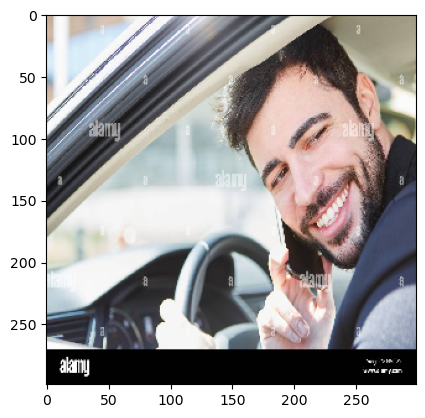

In [66]:
predict("D:/360DigitMG/Ptoject-2/data/testsamples/man-as-a-car-driver-when-talking-by-mobile-phone-is-distracted-RB41W4.jpg")